**Time serires forecasting fundametals**


Importing time serires with pandas


In [ ]:
import pandas as pd 
df=pd.read_csv("/content/VN 30 Historical Data.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-05-06,"1,373.21","1,399.54","1,399.54","1,371.00",129.91K,-2.25%
2022-05-05,"1,404.88","1,402.60","1,405.43","1,373.42",122.13K,1.10%
2022-05-04,"1,389.59","1,415.43","1,415.45","1,389.59",114.19K,-1.96%
2022-04-29,"1,417.31","1,400.88","1,417.31","1,394.17",128.04K,1.17%
2022-04-28,"1,400.88","1,400.60","1,407.82","1,392.24",91.68K,-0.08%


In [ ]:
len(df)
#Reverse dataframe
df=df[::-1]

In [ ]:
df["Price"]=df["Price"].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'],errors = 'coerce')
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2013-01-02,490.82,486.41,492.29,485.37,22.64K,1.12%
2013-01-03,491.34,492.55,492.55,483.84,32.69K,0.11%
2013-01-04,498.31,489.71,499.85,487.95,20.15K,1.42%
2013-01-07,509.18,500.58,509.61,498.54,26.03K,2.18%
2013-01-08,525.36,512.41,525.36,511.64,32.89K,3.18%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2328 entries, 2013-01-02 to 2022-05-06
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2328 non-null   float64
 1   Open      2328 non-null   object 
 2   High      2328 non-null   object 
 3   Low       2328 non-null   object 
 4   Vol.      2328 non-null   object 
 5   Change %  2328 non-null   object 
dtypes: float64(1), object(5)
memory usage: 127.3+ KB


In [ ]:
VN30_price=pd.DataFrame(df["Price"])


In [ ]:
VN30_price.head()

,Price
Date,
2013-01-02,490.82
2013-01-03,491.34
2013-01-04,498.31
2013-01-07,509.18
2013-01-08,525.36


Text(0.5, 1.0, 'Price of VN30 from 2 Jan 2013 to 6 May 2022')

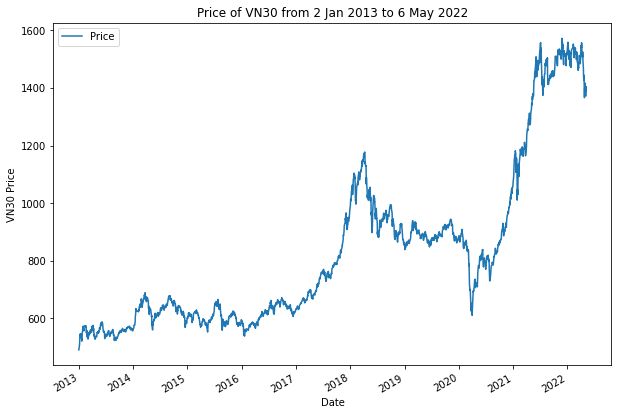

In [ ]:
import matplotlib.pyplot as plt
VN30_price.plot(figsize=(10,7))
plt.ylabel("VN30 Price")
plt.title("Price of VN30 from 2 Jan 2013 to 6 May 2022")

#Create train and test sets


In [ ]:
#VN30 date array
timesteps=VN30_price.index.to_numpy()
prices=VN30_price["Price"].to_numpy()
from sklearn.model_selection import train_test_split 
#Train 80%, Test 20%
X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    shuffle=False,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1862,), (466,), (1862,), (466,))

In [ ]:
#Create a function to plot time series data
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("VN30 Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

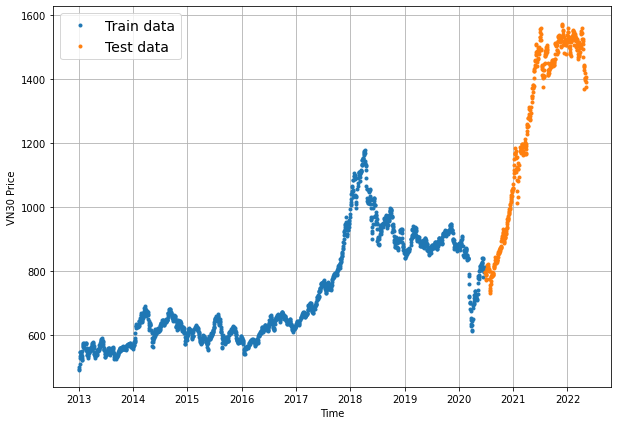

In [ ]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

**Horizon** = Number of timesteps to predict into future

**Window** = Number of timesteps from past used to predict Horizon

Muốn dự đoán Chỉ số VN30 ngày mai ( 1 ngày trong tương lai) thì sử dụng Chỉ số VN30 của 10 ngày phía trước. Horizon=1 và Window=10

# Model 1: Navie Forecast (baseline)

Một trong những mô hình cơ bản trong dự đoán time series, là naive model, không yêu cầu quá trình huấn luyện
Công thức: 
$$\hat{y}_{t} = y_{t-1}$$ 


> Giá trị dự đoán tại timestep `t` (y-hat) bằng giá trị tại timestep `t-1` (timestep phía trước đó).
Tuy đơn giản nhưng Naive Model có độ chính xác cao trong các Open System ( Như stock market hay crypto market)

In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10 

(array([796.51, 795.53, 774.81, 770.53, 786.82, 785.59, 789.87, 803.46,
        805.68, 805.06]),
 array([1435.5 , 1426.87, 1444.32, 1366.39, 1396.9 , 1402.03, 1400.88,
        1417.31, 1389.59, 1404.88]))

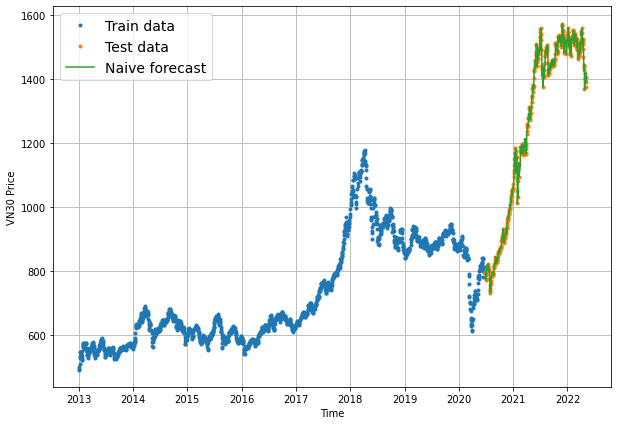

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

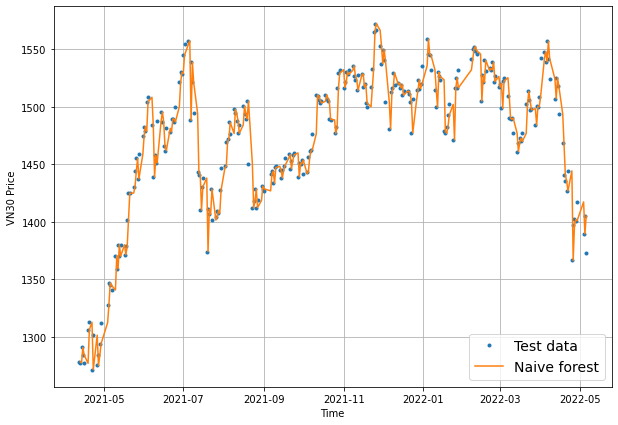

In [ ]:
#Focus on test dataset
plt.figure(figsize=(10,7))
offset=200 #offset the values y 200 timesteps
plot_time_series(timesteps=X_test,values=y_test,start=offset,label="Test data")
plot_time_series(timesteps=X_test[1:],values=naive_forecast,format="-",start=offset,label="Naive forest")

Vì sử dụng giá trị timestep phía trước để dự đoán giá trị tiếp theo nên Naive Forecast có chút lagging so với test data

# Evaluating a time series model
Time series forecasting thường là dự đoán các số.

Nên để đánh giá thì ta so sánh sự khác giữa giá trị dự đoán (y_pred) với giá trị thực ( y_true).

Ta kỳ vọng sự khác nhau là thấp nhất. 

Ở đây ta sẽ sử dụng một số metrics để đánh giá

### Scale-dependent errors

These are metrics which can be used to compare time series values and forecasts that are on the same scale.

Ví dụ như chỉ số VN30 thực tế và dự đoán được

| Metric | Details | Code |
| ----- | ----- | ----- |
| **MAE** (mean absolute error) | Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median. | [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) |
| **RMSE** (root mean square error) | Forecasts which minimise the RMSE lead to forecasts of the mean. | `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`|

### Percentage errors

Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MAPE** (mean absolute percentage error) | Most commonly used percentage error. May explode (not work) if `y=0`. | [`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE) | 


**R2(coefficient of determination)** regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a  score of 0.0.

In [ ]:
import tensorflow as tf


In [ ]:
def evaluate_preds(y_true, y_pred):
  y_true=tf.cast(y_true,dtype=tf.float32)
  y_pred=tf.cast(y_pred,dtype=tf.float32)

  #Calculate various metrics
  mae=tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse=tf.keras.metrics.mean_squared_error(y_true,y_pred) #emphasis outliers
  rmse=tf.sqrt(mse)
  mape=tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  from sklearn.metrics import r2_score
  r2score=r2_score(y_true, y_pred)

  return {"mae" : mae.numpy(), 
          "rmse" : rmse.numpy(),
          "mape" : mape.numpy(),
          "r2" : r2score
          }

In [ ]:
naive_results=evaluate_preds(y_true=y_test[1:],y_pred=naive_forecast)
naive_results

{'mae': 11.795142,
 'mape': 0.94764006,
 'r2': 0.9961809729783315,
 'rmse': 16.841702}

Độ lệch trung bình giữa chỉ số VN30 dự đoán và thực tế là 11.8
....

# **Format Data: Windowing dataset**
Windowing is a method to turn a time series dataset into supervised learning problem ( have features, labels)

In other words, we want to use windows of the past to predict the future

For example for a univariate time series, windowing for 10 days (*windows=10*) to predict the nexit single value  (*horizon=1*):

```
Window for 10 days (univariate time series)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] -> [10]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] -> [11]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11] -> [12]
```


In [ ]:
HORIZON=1 #predict 1 step at a time
WINDOW_SIZE=10 # Use 10 values to predict the horizon

In [ ]:

def make_windows(x,window_size=10,horizon=1):
  import numpy as np
  windows=[]
  labels=[]
  #10 timesteps and 1 output
  for i in range(window_size, len(x)):
    windows.append(x[i-window_size:i, 0]) 
    labels.append(x[i, 0])
  windows, labels = np.array(windows), np.array(labels)
  #Turns a 1D array into a 2D array of sequential windows of window_size.
  windows = np.reshape(windows, (windows.shape[0], windows.shape[1]))
  return windows, labels

In [ ]:
prices=VN30_price.iloc[:,0:1].values

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(full_windows.shape)
print(full_labels.shape)

(2318, 10)
(2318,)


In [ ]:
# Show the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [490.82 491.34 498.31 509.18 525.36 531.52 545.8  545.72 537.42 542.73] -> Label: 546.34
Window: [491.34 498.31 509.18 525.36 531.52 545.8  545.72 537.42 542.73 546.34] -> Label: 537.75
Window: [498.31 509.18 525.36 531.52 545.8  545.72 537.42 542.73 546.34 537.75] -> Label: 534.97


In [ ]:
#Show the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [1468.25 1440.61 1435.5  1426.87 1444.32 1366.39 1396.9  1402.03 1400.88
 1417.31] -> Label: 1389.59
Window: [1440.61 1435.5  1426.87 1444.32 1366.39 1396.9  1402.03 1400.88 1417.31
 1389.59] -> Label: 1404.88
Window: [1435.5  1426.87 1444.32 1366.39 1396.9  1402.03 1400.88 1417.31 1389.59
 1404.88] -> Label: 1373.21


In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(full_windows,full_labels,test_size=0.2, random_state=42,shuffle=False)
len(feature_train), len(feature_test), len(label_train), len(label_test)

(1854, 464, 1854, 464)

Make a modelling checkpoint

In [ ]:
import os 
#Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name), #filepath to save model
                                            verbose=0, #only ouput not processing
                                            save_best_only=True)


# Model 2: Dense Model ( Window=10, horizon=1)
A simple model, `model_2`:
* A single dense (fully connected) layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

Có thể tiến hành: hyperparameter tuning (the hidden units, the batch size, horizon size, window size)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

model_2=tf.keras.Sequential([
      layers.Dense(128,activation="relu"),
      layers.Dense(HORIZON)], name="model_2_dense")

#Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
#Fit model
model_2.fit(x=feature_train,
            y=label_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_split=0.2,
            callbacks=[create_model_checkpoint(model_name=model_2.name)])# create ModelCheckpoint callback to save best model

Epoch 1/100
12/12 [==============================] - 3s 191ms/step - loss: 283.5819 - mae: 283.5819 - val_loss: 18.2659 - val_mae: 18.2659
Epoch 2/100
12/12 [==============================] - 1s 115ms/step - loss: 66.4570 - mae: 66.4570 - val_loss: 17.4985 - val_mae: 17.4985
Epoch 3/100
12/12 [==============================] - 0s 9ms/step - loss: 29.6727 - mae: 29.6727 - val_loss: 41.0637 - val_mae: 41.0637
Epoch 4/100
12/12 [==============================] - 0s 10ms/step - loss: 22.3653 - mae: 22.3653 - val_loss: 17.7641 - val_mae: 17.7641
Epoch 5/100
12/12 [==============================] - 1s 107ms/step - loss: 16.9251 - mae: 16.9251 - val_loss: 17.4026 - val_mae: 17.4026
Epoch 6/100
12/12 [==============================] - 0s 11ms/step - loss: 14.2801 - mae: 14.2801 - val_loss: 17.6902 - val_mae: 17.6902
Epoch 7/100
12/12 [==============================] - 0s 8ms/step - loss: 14.1153 - mae: 14.1153 - val_loss: 17.6652 - val_mae: 17.6652
Epoch 8/100
12/12 [==========================

In [ ]:
# Load in saved best performing model_2 and evaluate on test data
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense")
model_2.evaluate(feature_test, label_test)

15/15 [==============================] - 0s 2ms/step - loss: 14.5431 - mae: 14.5431


[14.543062210083008, 14.543062210083008]

In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_2 on the test dataset and view the results
model_2_preds = make_preds(model_2, feature_test)
len(model_2_preds), model_2_preds[:10]

(464, <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([797.8196 , 788.203  , 780.87   , 783.5899 , 781.5788 , 785.2963 ,
        794.3596 , 797.32916, 802.21265, 812.61505], dtype=float32)>)

In [ ]:
# Evaluate preds
model_2_results = evaluate_preds(y_true=tf.squeeze(label_test), # reduce to right shape
                                 y_pred=model_2_preds)
model_2_results

{'mae': 14.543064,
 'mape': 1.1814356,
 'r2': 0.9946563334221062,
 'rmse': 19.881355}

In [ ]:
naive_results

{'mae': 11.795142,
 'mape': 0.94764006,
 'r2': 0.9961809729783315,
 'rmse': 16.841702}

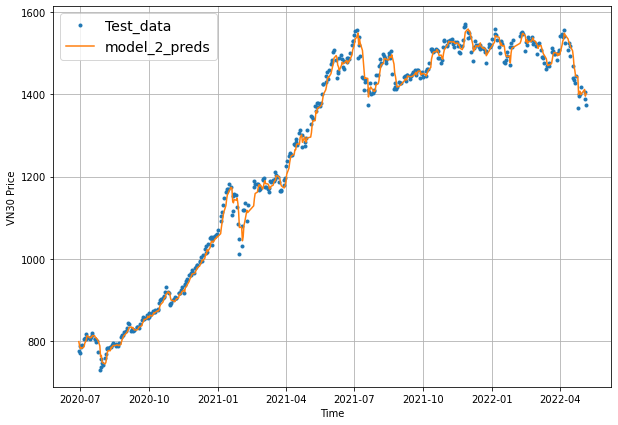

In [ ]:
offset =0
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(feature_test):], values=label_test, start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(feature_test):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

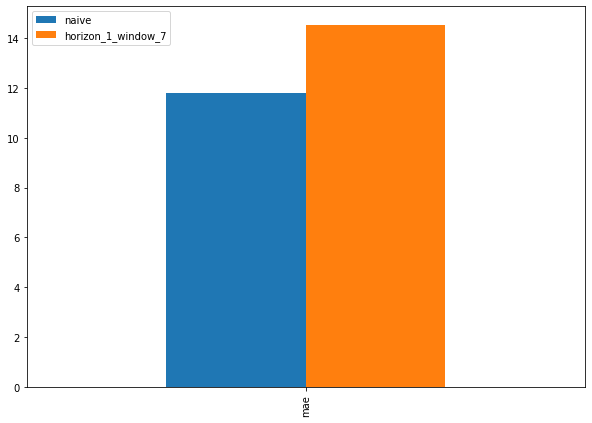

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_2_results["mae"]
              }, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# Model 3: Conv1D

Bài toán sequence to sequence. Many to one. Sử dụng window size = 10 và horizon =1

In [ ]:
HORIZON=1 #predict next day
WINDOW_SIZE=10 #use previous 10 day of data

In [ ]:
prices=VN30_price.iloc[:,0:1].values

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
print(full_windows.shape)
print(full_labels.shape)

(2318, 10)
(2318,)


In [ ]:
feature_train,feature_test,label_train,label_test=train_test_split(full_windows,full_labels,test_size=0.2, random_state=42,shuffle=False)
len(feature_train), len(feature_test), len(label_train), len(label_test)

(1854, 464, 1854, 464)

Data windowed!

Now, since we're going to be using [Conv1D layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: `(batch_size, timesteps, input_dim)`.

In our case, the `batch_size` (by default this is 32 but we can change it) is handled for us but the other values will be:
* `timesteps = WINDOW_SIZE` - the `timesteps` is also often referred to as `features`, our features are the previous `WINDOW_SIZE` values of VN30 
* `input_dim = HORIZON` - our model views `WINDOW_SIZE` (10 days) worth of data at a time to predict `HORIZON` (one day)

Right now, our data has the `timesteps` dimension ready but we'll have to adjust it to have the `input_dim` dimension. 

In [ ]:
feature_train[0].shape

(10,)

To fix this, we could adjust the shape of all of our feature_train or we could use a **Lamdba layer** to do

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(feature_train[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim) 
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (10,)
Expanded shape: (10, 1)
Original values with expanded shape:
 [[490.82]
 [491.34]
 [498.31]
 [509.18]
 [525.36]
 [531.52]
 [545.8 ]
 [545.72]
 [537.42]
 [542.73]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_conv1D")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_3.fit(feature_train,
            label_train,
            batch_size=128, 
            epochs=100,
            verbose=0,
             validation_split=0.2,
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets
INFO:tensorflow:Assets written to: model_experiments/model_3_conv1D/assets


In [ ]:
model_3.summary()

Model: "model_3_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 10)             0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            6528      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 6,657
Trainable params: 6,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Load in best performing Conv1D model and evaluate it on the test data
model_3=tf.keras.models.load_model("model_experiments/model_3_conv1D")
model_3.evaluate(feature_test,label_test)

15/15 [==============================] - 0s 2ms/step - loss: 38.4516


38.45155334472656

In [ ]:
# Make predictions
model_3_preds = make_preds(model_3, feature_test)
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([790.74805, 788.92426, 787.5976 , 786.80194, 785.27045, 782.62036,
       781.4223 , 781.38947, 780.425  , 783.1343 ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(label_test),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 31.677233,
 'mape': 2.5828464,
 'r2': 0.9806718736477049,
 'rmse': 37.811264}

In [ ]:
feature_train.shape[1]

10

# Model 4: RNN (LSTM)

In [ ]:
tf.random.set_seed(42)


inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
print(x.shape)
x = layers.LSTM(128, activation="relu")(x)
print(x.shape)

output = layers.Dense(HORIZON)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=output, name="model_4_lstm")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(feature_train,
            label_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_split=0.2,
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

(None, 1, 10)
(None, 128)
INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets
INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_4_lstm/assets


In [ ]:
# Load in best version of model 4 and evaluate on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_lstm/")
model_4.evaluate(feature_test,label_test)

15/15 [==============================] - 0s 2ms/step - loss: 22.4322


22.43215560913086

In [ ]:
# Make predictions with our LSTM model
model_4_preds = make_preds(model_4, feature_test)
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([800.0853 , 798.853  , 794.8706 , 791.9317 , 790.1942 , 789.14966,
       789.6178 , 790.95776, 792.81775, 796.994  ], dtype=float32)>

In [ ]:
# Evaluate model 4 preds
model_4_results = evaluate_preds(y_true=tf.squeeze(label_test),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 22.432154,
 'mape': 1.8310513,
 'r2': 0.9883782099277402,
 'rmse': 29.319925}

In [ ]:
# Compare different model results 
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_2_dense_w7_h1": model_2_results,
                              "model_3_CONV1D": model_3_results,
                              "model_4_LSTM": model_4_results}).T
model_results

,mae,rmse,mape,r2
naive_model,11.795142,16.841702,0.947640,0.996181
model_2_dense_w7_h1,14.543064,19.881355,1.181436,0.994656
model_3_CONV1D,31.677233,37.811264,2.582846,0.980672
model_4_LSTM,22.432154,29.319925,1.831051,0.988378


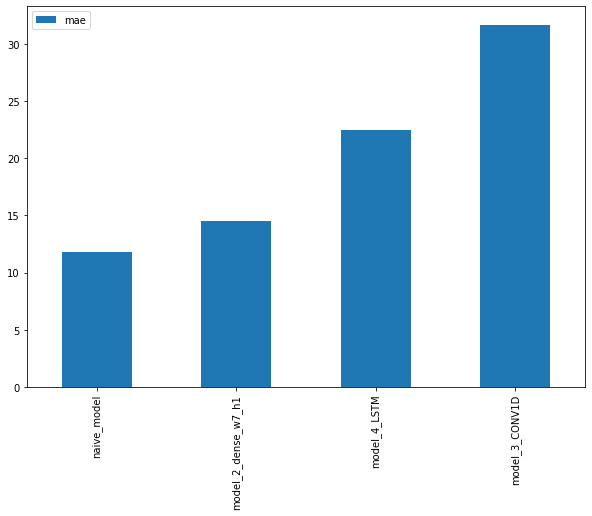

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");